# Data Mining and Big Data Analytics: Models for Regression

## Taguhi Hakobyan 

### Central European University


## #  Introduction

1. I use the data of  [Cleveland Hearth Diseases dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) about heart diseases and their possible indicators. The database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. Here I will focus only on the following attributes:

    - #3 (age) age in years
    - #4 (sex) 1-male
    - #9 (cp) chest pain type 
            -- Value 1: typical angina 
            -- Value 2: atypical angina 
            -- Value 3: non-anginal pain 
            -- Value 4: asymptomatic
    - #10 (trestbps) resting blood pressure (in mm Hg on admission to the hospital)
    - #12 (chol) serum cholestoral in mg/dl
    - #16 (fbs) (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - #19 (restecg) : resting electrocardiographic results 
            -- Value 0: normal 
            -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
            -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
    - #32 (thalach) maximum heart rate achieved
    - #38 (exang) exercise induced angina (1 = yes; 0 = no) 
    - #40 (oldpeak) ST depression induced by exercise relative to rest 
    - #41 (slope) the slope of the peak exercise ST segment 
            -- Value 1: upsloping 
            -- Value 2: flat 
            -- Value 3: downsloping 
    - #44 (ca) number of major vessels (0-3) colored by flourosopy 
    - #51 (thal) thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
    - #58 (num) (the predicted attribute) diagnosis of heart disease (angiographic disease status) 
            -- Value 0: < 50% diameter narrowing 
            -- Value 1: > 50% diameter narrowing 
            Presence: 1-2-3-4; No: 0
            
The original dataset can download from  [here](https://ceulearning.ceu.edu/pluginfile.php/253876/course/section/94141/cleveland.csv). For the meaning of each of the attribute you can check [dataset web page](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) .
<br><br>


# Section 1: Data Description

In this section I will load the data, clean it from unnessesary ones, leaving only those required for the analysis. Additionally, I also do a simple description of the data. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import matplotlib as pl
%matplotlib inline

In [2]:
import pandas as pd

df = pd.read_csv("cleveland.csv", header=None)
# select the columns of interest
df = pd.concat([
        df.iloc[:,2:4], df.iloc[:,8:10], 
        df.iloc[:,11], df.iloc[:,15], df.iloc[:,18],
        df.iloc[:,31], df.iloc[:,37], df.iloc[:,39:41], 
        df.iloc[:,43], df.iloc[:,50], df.iloc[:,57]], axis=1)
# rename the columns
df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [5]:
df.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype=object)

In [6]:
for col in df.columns.values:
    a=pd.Series(df[col]).isnull().values.any()
    print(str(col)+'  ' +str(a))

age  False
sex  False
cp  False
trestbps  False
chol  False
fbs  False
restecg  False
thalach  False
exang  False
oldpeak  False
slope  False
ca  False
thal  False
num  False


Above I checked for the missing values, and it reveals that there is no missing values, so I can proceed. 

In [7]:
X = df.iloc[:,0:13]
y = df['num']

Below I present a table with summary of main characteristics of the data. We see that there are 282 data for each atrributes. For example, in this data sample, average age is about 54 years, with maximum of 77 years old and minimum of 29. For the age I conclude that 67 % of are males. 

In [8]:
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  282.000000  282.000000  282.000000  282.000000  282.000000  282.000000   
mean    54.411348    0.677305    3.163121  131.563830  249.092199    0.148936   
std      9.053083    0.468338    0.955405   17.757496   51.217546    0.356658   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  213.000000    0.000000   
50%     55.000000    1.000000    3.000000  130.000000  244.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  277.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  282.000000  282.000000  282.000000  282.000000  282.000000  282.000000   
mean     1.014184  149.765957    0.326241    1.026950    1.585106    0.595745   
std      0.998118   22.9238

Below, the correlation matrix between characteristics of the disease is presented.

<AxesSubplot:>

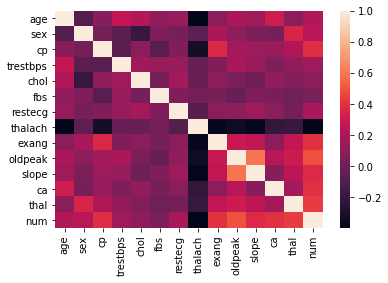

In [9]:
sb.heatmap(df.corr(), 
            xticklabels=df.corr().columns.values,
            yticklabels=df.corr().columns.values, annot=False)

# Section 2: Linear Regression Models for Big Data

In this section I compare the performances of different two different model of regression: Decision Tree, K-NN neighbor, OLS,  LinearSVC and Logistic Regression.
The purpose is to see which one performs better based on the accuracy.

In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# OLS

For OLS, I will proceed with the original variable defined as y, which has 5 different outcomes.

In [11]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
X_train1, X_test1, y_train, y_test = train_test_split(X, y, random_state=None)

In [12]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train1, y_train)

print('Coefficients: \n', linear_regressor.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, linear_regressor.predict(X_test1)))
print('R^2 (training): %f' % r2_score(y_train, linear_regressor.predict(X_train1)))
print('R^2 (testing): %f' % r2_score(y_test, linear_regressor.predict(X_test1)))

Coefficients: 
 [-0.01297712  0.28714768  0.25058778  0.00491102  0.00078382  0.14868264
  0.17912564 -0.00669453  0.14706086  0.26198714  0.01293044  0.22582988
  0.0835281 ]
Mean squared error: 0.80
R^2 (training): 0.490967
R^2 (testing): 0.501674


The explained variance in the residuals relative to the total variance is 0.52, which is quite high. It seems like the biggest effect can be attributed to the "sex" - ceteris paribus, being a man raises the score of the patient by 0.3. I visualised the prediction below:

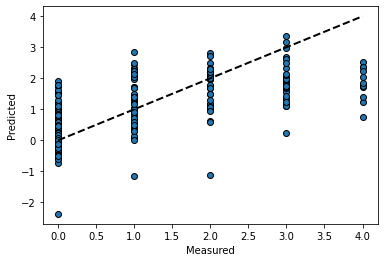

In [13]:
import matplotlib.pyplot as plt
import numpy as np

predicted1 = cross_val_predict(linear_regressor, X, y, cv=5)

fig, ax = plt.subplots()
ax.scatter(y, predicted1, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [14]:
results1 = cross_val_score(linear_regressor, X_train1, y_train, cv=5)
print(results1)
print("mean: ", np.mean(results1))

[ 0.40008862  0.38036152  0.38618799  0.51803133 -0.42804337]
mean:  0.25132521734668267


In [15]:
print("We obtained the cross validation score of : ", np.mean(results1))

We obtained the cross validation score of :  0.25132521734668267


We also can visualize the learning curve, which will show what is the optimal size of the training set. 

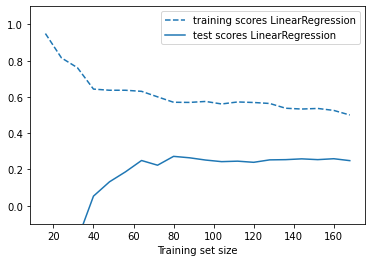

In [16]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(est, X, y, train_sizes=np.linspace(.1, 1, 20))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--', label="training scores " + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-', label="test scores " + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.legend(loc='best')
    plt.ylim(-0.1, 1.1)

plt.figure()   
plot_learning_curve(LinearRegression(), X_train1, y_train)

The learning curve shows that it is enough to take training size about 130 (out of 282) to make a good model, as above that the test performance doesn't imporove significanty. 

# LPM model

To use the LPM (Linear probability model) we need a binary variable, that is why I will transform dependent variable "num" to Y, which takes the value of 0, if "num" is 0 (meaning if there is no disease), and 1 otherwise. So simply, y shows whether the disease is present, no matter of degree.

In [17]:
A=y.values
B=[]
for i in A:
    if i==0:
        B.append(i)
    else:
        B.append(1)

Y=pd.Series(B)

In [18]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=None)

In [19]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

print('Coefficients: \n', linear_regressor.coef_)
print("Mean squared error: %.2f" % mean_squared_error(Y_test, linear_regressor.predict(X_test)))
print('R^2 (training): %f' % r2_score(Y_train, linear_regressor.predict(X_train)))
print('R^2 (testing): %f' % r2_score(Y_test, linear_regressor.predict(X_test)))
print('average accuracy: %f' %np.average(cross_val_score(linear_regressor, X, Y, cv=5)))

Coefficients: 
 [ 1.16050379e-05  1.78344800e-01  1.13107998e-01  1.41702290e-03
 -9.15712873e-06 -2.33695808e-03  7.50873533e-02 -3.30468950e-03
  1.03880319e-01  7.41001940e-02 -3.20701975e-02  5.61378138e-02
  5.78849419e-02]
Mean squared error: 0.14
R^2 (training): 0.497359
R^2 (testing): 0.408346
average accuracy: 0.404762


The explained variation in this model is lower than in case of OLS (which is understandable, since our categorization is too simple). Below I have a representation of our prediction - even just by looking at it, it seems a bit unreasonable:

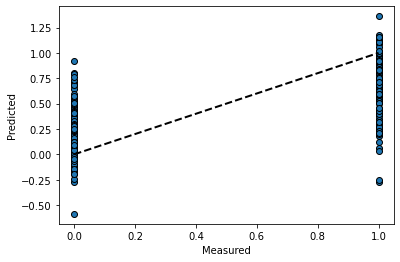

In [20]:
import matplotlib.pyplot as plt
import numpy as np

predicted = cross_val_predict(linear_regressor, X, Y, cv=5)

fig, ax = plt.subplots()
ax.scatter(Y, predicted, edgecolors=(0, 0, 0))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

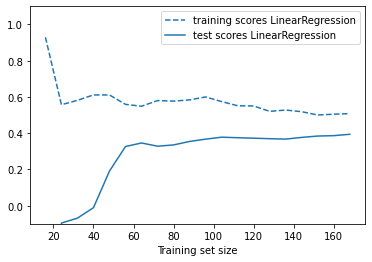

In [21]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(est, X, Y):
    training_set_size, train_scores, test_scores = learning_curve(est, X, Y, train_sizes=np.linspace(.1, 1, 20))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--', label="training scores " + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-', label="test scores " + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.legend(loc='best')
    plt.ylim(-0.1, 1.1)

plt.figure()   
plot_learning_curve(LinearRegression(), X_train, Y_train)

In case of LPM, Below is the learning curve for the LPM model - the optimal training sample seems to be around 90-100 (out of 282), since above that the test scores don't substantially grow.

# K-NN Neighbors Classifier


Here we perform the K-NN, to find the optimal parameter value for these data set. 

In [22]:
from sklearn.neighbors import KNeighborsClassifier


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=0)
print("Size of training set: {}   size of test set: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0

for current_k in range(1,30,1):
    
    knn = KNeighborsClassifier(n_neighbors=current_k)
    knn.fit(X_train, y_train)

    score = knn.score(X_test, y_test)

    if score > best_score:
        best_score = score
        best_parameters = {'n_neighbors': current_k}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 211   size of test set: 71
Best score: 0.58
Best parameters: {'n_neighbors': 10}


The test shows that the best parameter for K =10, based on the test score. So our choice model is 10-NN. 

# 2.1 LinearSVC

In this section we perform the Linear Support Vector Classification model. Also, I will look for the best performance of the LinearSVCs, based on parameter value of C. 

In [24]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(5, 13)
(5,)


/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [25]:
linear_svm = LinearSVC()
linear_svm.fit(X, y)

/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV


X_lin, y_lin = X, y
X_lin_train, X_lin_test, y_lin_train, y_lin_test = train_test_split(X_lin, y_lin, random_state=1)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(LinearSVC(), param_grid=param_grid, cv=10, verbose=3)
grid.fit(X_lin_train, y_lin_train)
print('Best score for LinearSVC: {}'.format(grid.score(X_lin_test, y_lin_test)))
print('Best parameters for LinearSVC: {}'.format(grid.best_params_))

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.545, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.524, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.667, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.667, total=   0.0s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: Co

[CV] ............................. C=0.001, score=0.524, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.571, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.571, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.619, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.571, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.429, total=   0.0s
[CV] C=0.01 ..........................................................


/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning

[CV] .............................. C=0.01, score=0.591, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.571, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.619, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.571, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.571, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.619, total=   0.0s
[CV] C=0.01 ..........................................................


/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning

[CV] .............................. C=0.01, score=0.667, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.524, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.429, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.571, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.545, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.524, total=   0.0s
[CV] C=0.1 ...........................................................


/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning

[CV] ............................... C=0.1, score=0.571, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.190, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.524, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.524, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.619, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.619, total=   0.0s
[CV] C=0.1 ...........................................................


/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning

[CV] ............................... C=0.1, score=0.524, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.476, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.545, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.524, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.381, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.524, total=   0.0s
[CV] C=1 .............................................................


/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning

[CV] ................................. C=1, score=0.524, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.524, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.524, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.571, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.571, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.286, total=   0.0s
[CV] C=10 ............................................................


/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning

[CV] ................................ C=10, score=0.545, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.524, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.571, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.143, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.667, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.476, total=   0.0s
[CV] C=10 ............................................................


/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning

[CV] ................................ C=10, score=0.524, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.571, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.571, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.238, total=   0.0s
Best score for LinearSVC: 0.6056338028169014
Best parameters for LinearSVC: {'C': 0.01}


/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.9s finished
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


From above, I obtain that the Best score for the LinearSVC is about 0.61, and the corresponding Best parameter for LinearSVC is C=0.001. 

In [27]:
linear_svm = LinearSVC(C=0.001)
linear_svm.fit(X, y)

/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=0.001)

# Logistic Regression

In this section we use the Logistic Regression, and again we look for the Best parameters for LogisticRegression, to choose the model that will perform the best. 

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression


X_log, y_log = X, y
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, random_state=1)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=10, verbose=3)
grid.fit(X_log_train, y_log_train)
print('Best score for LogisticRegression: {}'.format(grid.score(X_log_test, y_log_test)))
print('Best parameters for LogisticRegression: {}'.format(grid.best_params_))


Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.545, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.524, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.571, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.619, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.571, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.476, total=   0.0s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/mo

[CV] ............................. C=0.001, score=0.571, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.571, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.524, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.429, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.545, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.571, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.571, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .

/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

[CV] .............................. C=0.01, score=0.571, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.381, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.571, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.619, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.524, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.476, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.545, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] .

/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

[CV] ............................... C=0.1, score=0.619, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.667, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.524, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.524, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.524, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.571, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.524, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] .

/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

[CV] ................................. C=1, score=0.591, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.571, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.571, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.667, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.524, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.476, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.524, total=   0.0s
[CV] C=1 .............................................................
[CV] .

/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

[CV] ................................. C=1, score=0.571, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.429, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.591, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.571, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.619, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.667, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.524, total=   0.0s
[CV] C=10 ............................................................
[CV] .

/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Relying on the above regression, we choose the best hyperparameter value C=10. 

In [32]:
LogisticRegression(C=10)

LogisticRegression(C=10)

In [33]:
logreg = LogisticRegression(C=1.0)
logreg.fit(X_log_train, y_log_train)

/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# The variation of the performance in relation to different scaling mechanisms

In this section we do the comparison between all the models used above incuding the Decision Tree too, to see which one performs better. For the models with the choice of hyperparameter values, I use the ones under which they performed better, that is:
C=0.001 for Linear CSV
C=0.1 for Logistic regression
K=10 for K-NN


In [35]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler


In [45]:
scale_methods = [StandardScaler(), RobustScaler(), MinMaxScaler()]

models = [# DecisionTreeRegression(random_state=43), 
    # LinearRegression(),
    LinearSVC(C=0.001,random_state=43), 
    LogisticRegression(C=10, random_state=43, solver='sag',max_iter=100000), 
    LogisticRegression(random_state=43)
    # ,KNeighborsClassifier(n_neighbors=10)
]

for model in models:
    print(type(model).__name__)
    reference_score = np.average(cross_val_score(model, X, y, cv=5))
    
    for scaler in scale_methods:
        X_scaled = scaler.fit_transform(X)
        print('%s=> %f (%f)' %(type(scaler).__name__, 
                               np.average(cross_val_score(model, X_scaled, y, cv=5)), 
                               reference_score))
    print()

LinearSVC


/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning

StandardScaler=> 0.609962 (0.585213)
RobustScaler=> 0.595739 (0.585213)
MinMaxScaler=> 0.556704 (0.585213)

LogisticRegression
StandardScaler=> 0.574436 (0.617043)
RobustScaler=> 0.574436 (0.617043)
MinMaxScaler=> 0.592168 (0.617043)

LogisticRegression


/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

StandardScaler=> 0.585088 (0.606328)
RobustScaler=> 0.588596 (0.606328)
MinMaxScaler=> 0.592043 (0.606328)



/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/taguhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

There is no much difference between 4 models, even when we improved them with the best choice of hyperparameters. Among them, the Logistic regression has the highest score, while the Decision Tree model exhibits lowest score. 

Recalling the R-sqare for OLS was about 0.52, my choice of the model would be the Logistic Regression. 